In [12]:
import pandas as pd
import numpy as np

In [2]:
ob_bnn = pd.read_csv("round1/ob_bnn_train.csv", delimiter=";", index_col="timestamp")
trd_bnn = pd.read_csv("round1/trd_bnn_train.csv", delimiter=";", index_col=None)

In [4]:
ob_bnn

,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,
0,BANANAS,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.000000
100,BANANAS,4997,20,NaN,NaN,NaN,NaN,4998,1,5004.0,20.0,NaN,NaN,4997.5,2.863281
200,BANANAS,4997,31,NaN,NaN,NaN,NaN,5004,31,NaN,NaN,NaN,NaN,5000.5,2.536621
300,BANANAS,4997,27,NaN,NaN,NaN,NaN,5004,27,NaN,NaN,NaN,NaN,5000.5,2.405762
400,BANANAS,4997,20,NaN,NaN,NaN,NaN,5002,9,5004.0,20.0,NaN,NaN,4999.5,2.925781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999400,BANANAS,4891,31,NaN,NaN,NaN,NaN,4897,2,4898.0,29.0,NaN,NaN,4894.0,224452.000000
1999500,BANANAS,4891,2,4890.0,28.0,NaN,NaN,4897,30,NaN,NaN,NaN,NaN,4894.0,225812.000000
1999600,BANANAS,4890,26,NaN,NaN,NaN,NaN,4891,12,4897.0,26.0,NaN,NaN,4890.5,227996.000000


<Axes: xlabel='timestamp'>

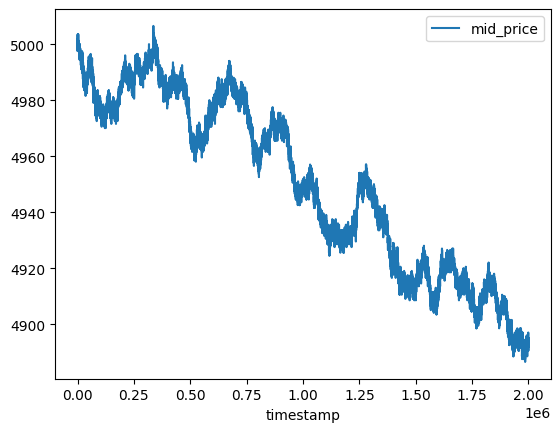

In [5]:
ob_bnn.plot(y='mid_price')

In [10]:
ob_tst = pd.read_csv("round1/prices_round_1_day_0.csv", delimiter=";", index_col="timestamp")
ob_tst = ob_tst.loc[ob_tst['product'] != 'PEARLS']
ob_tst

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,0,BANANAS,4893,1,4892.0,30.0,NaN,NaN,4899,30,NaN,NaN,NaN,NaN,4896.0,0.0
100,0,BANANAS,4892,31,NaN,NaN,NaN,NaN,4896,7,4898.0,31.0,NaN,NaN,4894.0,0.0
200,0,BANANAS,4892,22,NaN,NaN,NaN,NaN,4899,22,NaN,NaN,NaN,NaN,4895.5,0.0
300,0,BANANAS,4893,25,NaN,NaN,NaN,NaN,4899,2,4900.0,23.0,NaN,NaN,4896.0,0.0
400,0,BANANAS,4894,5,4893.0,25.0,NaN,NaN,4899,25,NaN,NaN,NaN,NaN,4896.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999500,0,BANANAS,4869,28,NaN,NaN,NaN,NaN,4872,6,4874.0,6.0,4876.0,28.0,4870.5,126424.0
999600,0,BANANAS,4869,29,NaN,NaN,NaN,NaN,4870,1,4874.0,3.0,4876.0,29.0,4869.5,125984.0
999700,0,BANANAS,4875,1,4870.0,2.0,4869.0,24.0,4876,26,NaN,NaN,NaN,NaN,4875.5,123508.0


In [15]:
ob_tst['lr'] = np.log(ob_tst['mid_price'].shift(1) / ob_tst['mid_price'])
ob_tst['vol'] = ob_tst['lr'].rolling(30).std()

<Axes: xlabel='timestamp'>

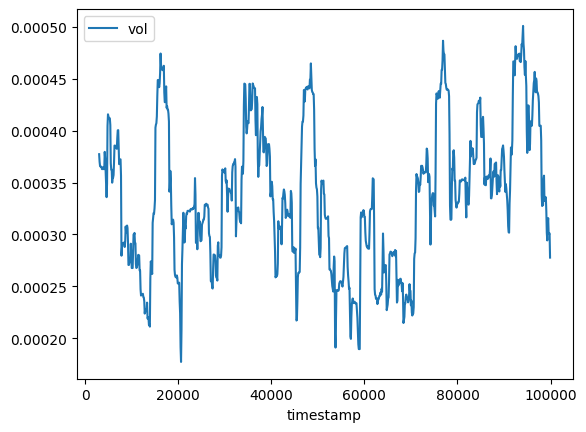

In [25]:
ob_tst[0:1000].plot(y='vol')

<Axes: xlabel='timestamp'>

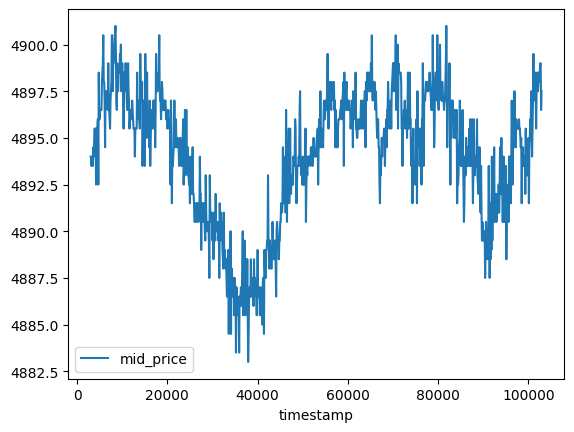

In [24]:
ob_tst[30:1030].plot(y='mid_price')

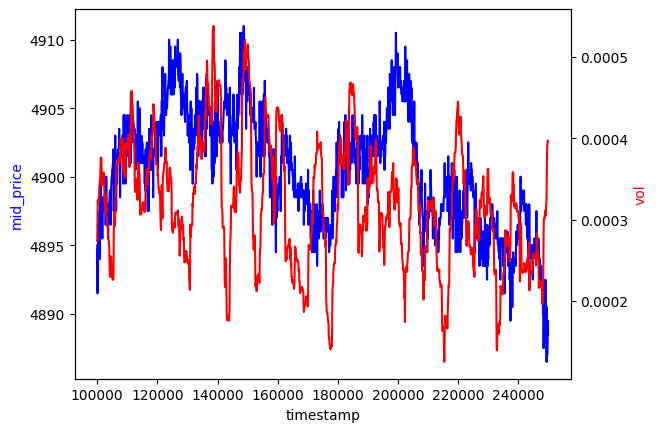

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
start = 1000
end = start + 1500
ax1.plot(ob_tst.index[start:end], ob_tst['mid_price'][start:end], color='blue')
ax1.set_xlabel('timestamp')
ax1.set_ylabel('mid_price', color='blue')

# create a second y-axis
ax2 = ax1.twinx()

# plot the second y-axis (profit)
ax2.plot(ob_tst.index[start:end], ob_tst['vol'][start:end], color='red')
ax2.set_ylabel('vol', color='red')

plt.show()